<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Libraries-&amp;-Data" data-toc-modified-id="Importing-Libraries-&amp;-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Libraries &amp; Data</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Base-Model" data-toc-modified-id="Base-Model-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Base Model</a></span></li><li><span><a href="#Logistic-Regression-Model" data-toc-modified-id="Logistic-Regression-Model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Logistic Regression Model</a></span></li><li><span><a href="#KNN-Model" data-toc-modified-id="KNN-Model-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>KNN Model</a></span></li><li><span><a href="#Decision-Tree-Model" data-toc-modified-id="Decision-Tree-Model-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Decision Tree Model</a></span></li><li><span><a href="#Bagging-Classifier-Model" data-toc-modified-id="Bagging-Classifier-Model-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Bagging Classifier Model</a></span></li><li><span><a href="#Random-Forest-Model" data-toc-modified-id="Random-Forest-Model-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Random Forest Model</a></span></li><li><span><a href="#Extra-Trees-Model" data-toc-modified-id="Extra-Trees-Model-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Extra Trees Model</a></span></li><li><span><a href="#AdaBoost-Model" data-toc-modified-id="AdaBoost-Model-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>AdaBoost Model</a></span></li><li><span><a href="#Gradient-Boost-Model" data-toc-modified-id="Gradient-Boost-Model-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Gradient Boost Model</a></span></li><li><span><a href="#SVC-Model" data-toc-modified-id="SVC-Model-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>SVC Model</a></span></li><li><span><a href="#Voting-Classifier-Model" data-toc-modified-id="Voting-Classifier-Model-2.11"><span class="toc-item-num">2.11&nbsp;&nbsp;</span>Voting Classifier Model</a></span></li></ul></li><li><span><a href="#Model-Selection" data-toc-modified-id="Model-Selection-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model Selection</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model Evaluation</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Recommendations" data-toc-modified-id="Recommendations-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Recommendations</a></span></li><li><span><a href="#Production" data-toc-modified-id="Production-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Production</a></span></li><li><span><a href="#Sources" data-toc-modified-id="Sources-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Sources</a></span></li></ul></div>

# Importing Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures, LabelBinarizer
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/final_dataset.csv') # importing dataset
df.head()

,name,yearpublished,minplayers,maxplayers,minplaytime,maxplaytime,minage,languagedependence,boardgamecategory_cnt,boardgamemechanic_cnt,...,Category Transportation,Category Travel,Category Trivia,Category Video Game Theme,Category Vietnam War,Category Wargame,Category Word Game,Category World War I,Category World War II,Category Zombies
0,Gloomhaven,2017,1,4,60,120,12,4,5,12,...,0,0,0,0,0,0,0,0,0,0
1,Pandemic Legacy Season 1,2015,2,4,60,60,13,4,2,8,...,0,0,0,0,0,0,0,0,0,0
2,Terraforming Mars,2016,1,5,120,120,12,3,6,9,...,0,0,0,0,0,0,0,0,0,0
3,Through the Ages A New Story of Civilization,2015,2,4,120,120,14,4,3,5,...,0,0,0,0,0,0,0,0,0,0
4,Brass Birmingham,2018,2,4,60,120,14,1,3,8,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# converting the avgweight feature to categorical data for better modeling
# using the categories found here: https://boardgamegeek.com/wiki/page/Weight
conversion_dict = {1: 'light',
                   2: 'medium light',
                   3: 'medium',
                   4: 'medium heavy',
                   5: 'heavy'}

In [4]:
df['avgweight'] = np.round(df['avgweight']) # rounding avgweight
df['avgweight'] = df['avgweight'].map(conversion_dict) # mapping the conversion dictionary to avgweight

In [5]:
# using PolynomialFeatures to engineer more columns to help create better models
features = df[['minplayers', 'maxplayers', 'minage', 'languagedependence', 'minplaytime', 'maxplaytime',
               'boardgamecategory_cnt', 'boardgamemechanic_cnt']]
poly = PolynomialFeatures(degree = 2)
output_array = poly.fit_transform(features)

In [6]:
# adding the new features from PolynomialFeatures to the dataframe
output_df = pd.DataFrame(output_array, columns = poly.get_feature_names(features.columns))
output_df.drop(columns = ['1', 'minplayers', 'maxplayers', 'minage', 'languagedependence', 
               'boardgamecategory_cnt', 'boardgamemechanic_cnt'], inplace = True)

df = pd.concat([df, output_df], axis=1, sort=False)
df.head()

,name,yearpublished,minplayers,maxplayers,minplaytime,maxplaytime,minage,languagedependence,boardgamecategory_cnt,boardgamemechanic_cnt,...,minplaytime^2,minplaytime maxplaytime,minplaytime boardgamecategory_cnt,minplaytime boardgamemechanic_cnt,maxplaytime^2,maxplaytime boardgamecategory_cnt,maxplaytime boardgamemechanic_cnt,boardgamecategory_cnt^2,boardgamecategory_cnt boardgamemechanic_cnt,boardgamemechanic_cnt^2
0,Gloomhaven,2017,1,4,60,120,12,4,5,12,...,3600.0,7200.0,300.0,720.0,14400.0,600.0,1440.0,25.0,60.0,144.0
1,Pandemic Legacy Season 1,2015,2,4,60,60,13,4,2,8,...,3600.0,3600.0,120.0,480.0,3600.0,120.0,480.0,4.0,16.0,64.0
2,Terraforming Mars,2016,1,5,120,120,12,3,6,9,...,14400.0,14400.0,720.0,1080.0,14400.0,720.0,1080.0,36.0,54.0,81.0
3,Through the Ages A New Story of Civilization,2015,2,4,120,120,14,4,3,5,...,14400.0,14400.0,360.0,600.0,14400.0,360.0,600.0,9.0,15.0,25.0
4,Brass Birmingham,2018,2,4,60,120,14,1,3,8,...,3600.0,7200.0,180.0,480.0,14400.0,360.0,960.0,9.0,24.0,64.0


In [7]:
X = df._get_numeric_data()
y = df['avgweight']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 1919)

# Modeling

## Base Model

In [8]:
y.value_counts(normalize = True)

medium light    0.441007
light           0.299170
medium          0.204245
medium heavy    0.053215
heavy           0.002364
Name: avgweight, dtype: float64

A base model that predicts 'medium light' would be correct 44% of the time.

## Logistic Regression Model

In [9]:
pipe = Pipeline(steps = [           # running a pipeline of a Logistic Regression
    ('lr', LogisticRegression())
])

params = {                          # setting parameters
    'lr__penalty' : ['l1'],
    'lr__C' : [1],
    'lr__solver' : ['liblinear']
}

gs_lr = GridSearchCV(pipe,
                    param_grid = params,
                    cv = 5,
                    scoring = 'accuracy',
                    n_jobs = -2)

gs_lr.fit(X_train, y_train)
gs_lr.best_estimator_

Pipeline(memory=None,
         steps=[('lr',
                 LogisticRegression(C=1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l1', random_state=None,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [10]:
gs_lr.score(X_train, y_train) # scoring the model

0.6411010716537088

In [11]:
cross_val_score(gs_lr.best_estimator_, X, y, cv = 5).mean() # cross-val score

0.6165144150646862

In [12]:
gs_lr.score(X_test, y_test) #test score

0.6253414582895567

This model already does better than the base model, but there is definite room for improvement. Let's try a KNN model next.

## KNN Model

In [13]:
pipe = Pipeline(steps = [                 # setting a KNN model with a standard scaler
    ('sc', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

params = {                                # setting model paramenters
    'knn__n_neighbors' : [21],
    'knn__p' : [1]
}

gs_knn = GridSearchCV(pipe,
                    param_grid = params,
                    cv = 5,
                    scoring = 'accuracy')

gs_knn.fit(X_train, y_train)
gs_knn.best_estimator_

Pipeline(memory=None,
         steps=[('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=21, p=1,
                                      weights='uniform'))],
         verbose=False)

In [14]:
gs_knn.score(X_train, y_train) # scoring the model

0.6472648315472438

In [15]:
cross_val_score(gs_knn.best_estimator_, X, y, cv = 5).mean() # cross-val score

0.5956588841210242

In [16]:
gs_knn.score(X_test, y_test) # test score

0.6041185122924985

This model performs almost as well as as the Logistic Regression Model. Let's try a Decision Tree model next.

## Decision Tree Model

In [17]:
pipe = Pipeline(steps = [                 # setting a Decision Tree model
    ('tree', DecisionTreeClassifier())
])

params = {                                # setting model paramenters
    'tree__max_depth' : [6, 8],
}

gs_tree = GridSearchCV(pipe,
                    param_grid = params,
                    cv = 5,
                    scoring = 'accuracy'
                    )

gs_tree.fit(X_train, y_train)
gs_tree.best_estimator_

Pipeline(memory=None,
         steps=[('tree',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=8,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=None,
                                        splitter='best'))],
         verbose=False)

In [18]:
gs_tree.score(X_train, y_train) # scoring the model

0.6876094417594732

In [19]:
cross_val_score(gs_tree.best_estimator_, X, y, cv = 5).mean() # cross-val score

0.6256009358037935

In [20]:
gs_tree.score(X_test, y_test) # test score

0.6297541500315192

The Decision Tree is just a bit stronger than the Logistic Regression model. Let's move on to a Bagging Classifier next to see if it improves.

## Bagging Classifier Model

In [21]:
pipe = Pipeline(steps = [                 # setting up a Bagging Classifier model
    ('bag', BaggingClassifier())
])

params = {                                # setting model paramenters
    'bag__n_estimators' : [200],
}

gs_bag = GridSearchCV(pipe,
                    param_grid = params,
                    cv = 5,
                    scoring = 'accuracy'
                    )

gs_bag.fit(X_train, y_train)
gs_bag.best_estimator_

Pipeline(memory=None,
         steps=[('bag',
                 BaggingClassifier(base_estimator=None, bootstrap=True,
                                   bootstrap_features=False, max_features=1.0,
                                   max_samples=1.0, n_estimators=200,
                                   n_jobs=None, oob_score=False,
                                   random_state=None, verbose=0,
                                   warm_start=False))],
         verbose=False)

In [22]:
gs_bag.score(X_train, y_train) # scoring the model

0.9981088463963017

In [23]:
cross_val_score(gs_bag.best_estimator_, X, y, cv = 5).mean() # cross-val score

0.6313273398405855

In [24]:
gs_bag.score(X_test, y_test) # test score

0.6453036352174827

This is the best model so far, but definitely overfit. Let's move up the bias-variance tradeoff with a Random Forest Model.

## Random Forest Model

In [25]:
pipe = Pipeline(steps = [                 # setting up a Random Forest model
    ('forest', RandomForestClassifier())
])

params = {                                # setting model paramenters
    'forest__n_estimators' : [150],
    'forest__max_depth' : [15]
}

gs_forest = GridSearchCV(pipe,
                    param_grid = params,
                    cv = 5,
                    scoring = 'accuracy'
                    )

gs_forest.fit(X_train, y_train)
gs_forest.best_estimator_

Pipeline(memory=None,
         steps=[('forest',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=15, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=150, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [26]:
gs_forest.score(X_train, y_train) # scoring the model

0.871121384044267

In [27]:
cross_val_score(gs_forest.best_estimator_, X, y, cv = 5).mean() # cross-val score

0.6383663828021359

In [28]:
gs_forest.score(X_test, y_test) # test score

0.6474049169993696

Random Forests is about as good as the Bagging Classifier. Let's continue up the bias-variance trade-off to an Extra Trees model.

## Extra Trees Model

In [29]:
pipe = Pipeline(steps = [                 # setting up and Extra Trees model
    ('extra', ExtraTreesClassifier())
])

params = {                                # setting model paramenters
    'extra__n_estimators' : [600],
    'extra__max_depth' : [None]
}

gs_extra = GridSearchCV(pipe,
                    param_grid = params,
                    cv = 5,
                    scoring = 'accuracy'
                    )

gs_extra.fit(X_train, y_train)
gs_extra.best_estimator_

Pipeline(memory=None,
         steps=[('extra',
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='auto',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=600, n_jobs=None,
                                      oob_score=False, random_state=None,
                                      verbose=0, warm_start=False))],
         verbose=False)

In [30]:
gs_extra.score(X_train, y_train) # scoring the model

0.9981088463963017

In [31]:
cross_val_score(gs_extra.best_estimator_, X, y, cv = 5).mean() # cross-val score

0.6375255224233112

In [32]:
gs_extra.score(X_test, y_test) # test score

0.6419415843664635

This is not about as strong as the Bagging Classifier model. Going to try boosting models next, to see how they perform.

## AdaBoost Model

In [33]:
pipe = Pipeline(steps = [                 # setting up an AdaBoost model
    ('ada', AdaBoostClassifier())
])

params = {                                # setting model paramenters
    'ada__n_estimators' : [10],
}

gs_ada = GridSearchCV(pipe,
                    param_grid = params,
                    cv = 5,
                    scoring = 'accuracy'
                    )

gs_ada.fit(X_train, y_train)
gs_ada.best_estimator_

Pipeline(memory=None,
         steps=[('ada',
                 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                                    learning_rate=1.0, n_estimators=10,
                                    random_state=None))],
         verbose=False)

In [34]:
gs_ada.score(X_train, y_train) # scoring the model

0.5311339917349583

In [35]:
cross_val_score(gs_ada.best_estimator_, X, y, cv = 5).mean() # cross-val score

0.5370845087443961

In [36]:
gs_ada.score(X_test, y_test) # test score

0.5242698045807943

AdaBoost doesn't perform as well as I'd hope, scoring below even the KNN model. Let's move on to a Gradient Boosting model next.

## Gradient Boost Model

In [37]:
pipe = Pipeline(steps = [                 # setting up a Gradient Boost model
    ('grad', GradientBoostingClassifier())
])

params = {                                # setting model paramenters
    'grad__n_estimators' : [300],
    'grad__max_depth'    : [3]
    
}

gs_grad = GridSearchCV(pipe,
                    param_grid = params,
                    cv = 5,
                    scoring = 'accuracy'
                    )

gs_grad.fit(X_train, y_train)
gs_grad.best_estimator_

Pipeline(memory=None,
         steps=[('grad',
                 GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=300,
                                            n_iter_no_change=None,
                                            presort='deprecated',
                                            random_sta

In [38]:
gs_grad.score(X_train, y_train) # scoring the model

0.7533795615325348

In [39]:
cross_val_score(gs_grad.best_estimator_, X, y, cv = 5).mean() # cross-val score

0.647139322632126

In [40]:
gs_grad.score(X_test, y_test) # test score

0.6545492750577853

This is the best model so far, but there is still room for improvement. The next step is to try a Support Vector Machine.

## SVC Model

In [41]:
pipe = Pipeline(steps = [                 # setting up an SVC model
    ('svc', SVC())
])

params = {                                # setting model paramenters
    'svc__C' : [3],
}

gs_svc = GridSearchCV(pipe,
                    param_grid = params,
                    cv = 5,
                    scoring = 'accuracy'
                    )

gs_svc.fit(X_train, y_train)
gs_svc.best_estimator_

Pipeline(memory=None,
         steps=[('svc',
                 SVC(C=3, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [42]:
gs_svc.score(X_train, y_train) # scoring the model

0.4423898578132661

In [43]:
cross_val_score(gs_svc.best_estimator_, X, y, cv = 5).mean() # cross-val score

0.4418995967181199

In [44]:
gs_svc.score(X_test, y_test) # test score

0.4416894305526371

The added dimensionality of the SVC model didn't help much. This is the weakest model yet, just a few percentage points better than the base model. The last step is to try a Voting Classifier.

## Voting Classifier Model

In [45]:
knn_pipe = Pipeline([                          # setting up a pipeline for a KNN model
    ('ss', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

vote = VotingClassifier([                      # setting up a Voting Classifer model with multiple model inside it
    ('rand', RandomForestClassifier()),
    ('grad', GradientBoostingClassifier()),
    ('lr', LogisticRegression()),
    ('tree', DecisionTreeClassifier()),
    ('bag', BaggingClassifier()),
    ('ada', AdaBoostClassifier()),
    ('extra', ExtraTreesClassifier()),
    ('knn_pipe', knn_pipe)
],
                        voting='soft')
vote_params = {                                # setting model paramenters for each model in the Voting Classifier
    'rand__n_estimators' : [150],
    'rand__max_depth' : [15],
    'grad__n_estimators' : [300],
    'tree__max_depth' : [8],
    'bag__n_estimators' : [200],
    'ada__n_estimators' : [10],
    'extra__n_estimators' : [600],
    'knn_pipe__knn__n_neighbors': [21],
    'lr__penalty' : ['l1'],
    'lr__C' : [1],
    'lr__solver' : ['liblinear']    
}
gs_vc = GridSearchCV(vote,
                     param_grid=vote_params,
                     cv=5,
                     scoring='accuracy'
                     )
gs_vc.fit(X_train, y_train)
gs_vc.best_estimator_

VotingClassifier(estimators=[('rand',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=15,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
        

In [46]:
gs_vc.score(X_train, y_train) # scoring the model

0.916649155985151

In [47]:
cross_val_score(gs_vc.best_estimator_, X, y, cv = 5).mean() # cross-val score

0.6521301842249903

In [48]:
gs_vc.score(X_test, y_test) # test score

0.6648455557890313

This is the best model so far, slightly surpassing the Gradient Boost model.

# Model Selection

The Voting Classifier model is the best model of all those tested with an accuracy of about 66.1%. Voting Classifiers are very hard to evaluate, however, because they are ensemble models. So while the Voting Classifier would be used to predict the complexity of a game, we'll evaluate the Logistic Regression model. The Logistic Regression model is only a few points off the Voting Classifier with an accuracy of about 62.2%.

# Model Evaluation

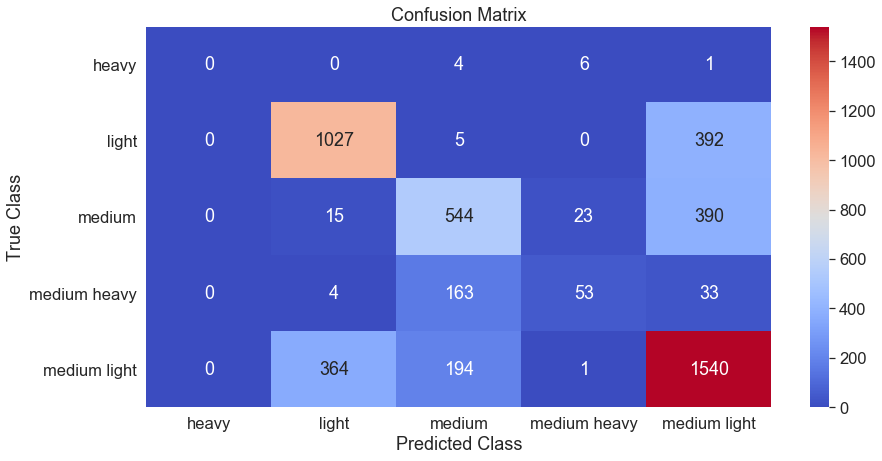

In [49]:
vc_preds = gs_vc.best_estimator_.predict(X_test) #getting predictions from the voting classifier model

def pretty_confusion_matrix(y_true, y_pred):
    '''
    Creates a confusion matrix and puts it into a prettier looking image.
    '''
    # handling data
    cm = confusion_matrix(y_true, y_pred)
    labels = y_true.unique()
    labels.sort()
    
    
    # plotting
    sns.set(font_scale=1.5)
    plt.figure(figsize=(14,7))
    
    chart = sns.heatmap(cm, annot=True, fmt='g', cmap="coolwarm", xticklabels = labels, yticklabels = labels)
    chart.set_yticklabels(chart.get_yticklabels(), rotation=0)
    plt.title("Confusion Matrix")
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')

pretty_confusion_matrix(y_test, vc_preds)

In [50]:
print(f'Light positive rate       : {1022/(1022+5+397+0+0)}')
print(f'Medium light positive     : {1532/(1532+2+200+365+0)}')
print(f'Medium  positive          : {538/(538+15+25+394+0)}')
print(f'Medium heavy positive     : {54/(54+3+163+0+33)}')
print(f'Heavy positive            : {0}')

Light positive rate       : 0.7176966292134831
Medium light positive     : 0.7298713673177704
Medium  positive          : 0.5534979423868313
Medium heavy positive     : 0.2134387351778656
Heavy positive            : 0


The Voting Classifier model is best at predicting medium light complexity board games, with a positive rate of about 73%. This isn't surprising as there are more medium light complexity games than anything else in the dataset. In the entire dataset, about 44% of games are medium light complexity. When the model misclassifies medium light complexity games, it is likely to classify them as either light or medium, the next two most populated categories.

The model also does very well at classifying light complexity games. It correctly classifies simpler games about 71.7% of the time. When it incorrectly classifies a light complexity board game, it is likely to classify the game as having medium light complexity. This makes sense, as the two categories are close and both contain a large number of games.

With a positive rate of 55.3%, the Voting Classifier model doesn't do too well at predicting medium complexity games. While it correctly classified 538 medium complexity games, it misclassified 394 of them as medium light. Only 14 and 25 were misclassified as light and medium heavy, respectively.

Overall, if the model misclassifies a game, it's more likely to place it in the medium light class than anything else.

There were only 11 heavy complexity games in the test set, and the model was unable to correctly classify any of them.

Next, let's look at the Logistic Regression model's coefficients of each class, starting with light complexity and moving up to heavy.

In [51]:
keys = list(X_test.keys()) # getting list of features
classes = gs_lr.best_estimator_.steps[0][1].classes_ # getting the classes from the Logistic Regression model
coefs = gs_lr.best_estimator_.steps[0][1].coef_ # getting the coefficients from the model
coefs_df = pd.DataFrame(keys, columns = ['features']) #setting up a dataframe with the features in one column
for i, cl in enumerate(classes): # filling out the dataframe with the coefficients of each feature, separate by class
    coefs_df[cl] = coefs[i]

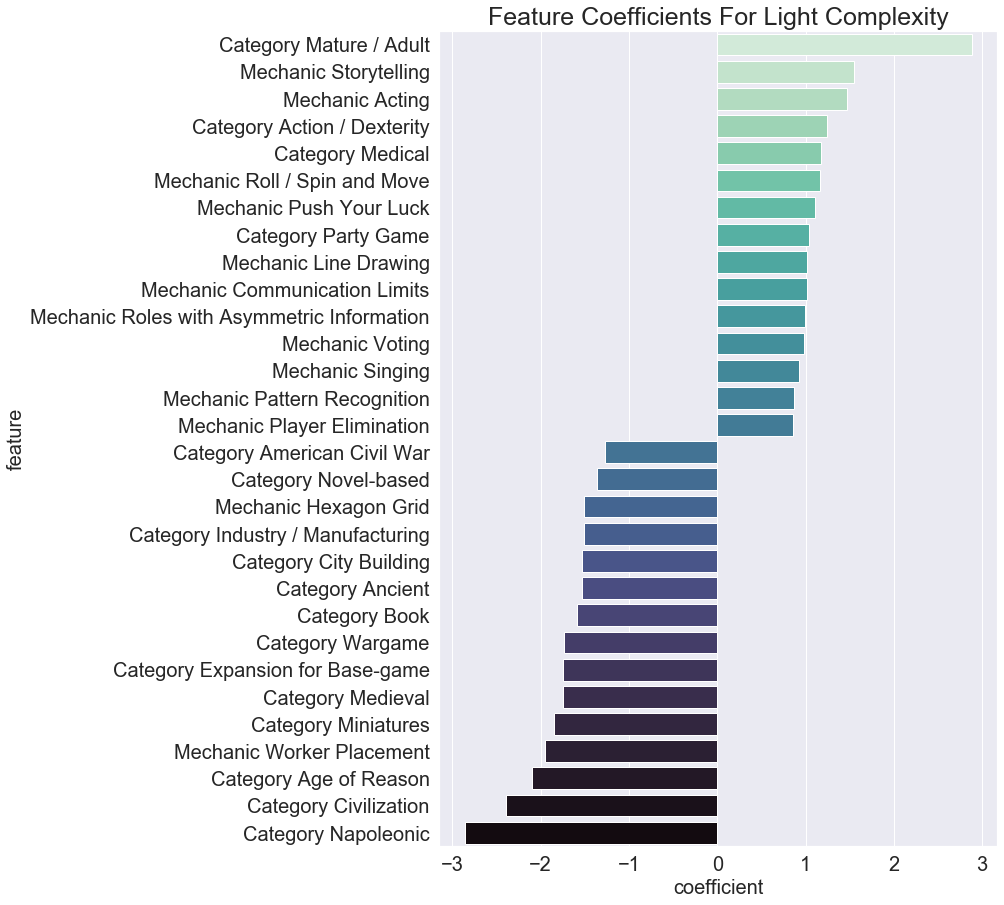

In [52]:
def coef_plot(category):
    '''
    Plots the top 15 and bottom 15 coefficients for the complexity category specified
    '''
    coefs_1 = coefs_df.sort_values(by=category, ascending=False).head(15) # getting the top 15 coefficients
    coefs_2 = coefs_df.sort_values(by=category, ascending=False).tail(15) # getting the bottom 15 coefficients
    coefs = pd.concat([coefs_1, coefs_2], axis = 0) # merging the two into one
    # plotting importance
    plt.figure(figsize=(10, 15)) # plotting the coefficients
    plt.title(f'Feature Coefficients For {category.title()} Complexity', fontsize=25)
    sns.set_style("darkgrid")
    sns.barplot(data=coefs,
                x=category,
                y='features',
                orient='h',
                palette="mako_r")
    plt.xlabel('coefficient', fontsize=20)
    plt.ylabel('feature', fontsize=20)
    plt.tick_params(labelsize=20)
coef_plot('light')

The biggest coefficient for light complexity board games is category mature/adult. This seems counterintuitive at first, but with popular card games like [Cards Against Humanity](https://boardgamegeek.com/boardgame/50381/cards-against-humanity), it makes sense that mature or adult games would be simpler. Less complexity means you can play the game while drunk or otherwise inebriated.

Storytelling and acting mechanics are also strong indicators that a game is of light complexity. This would include games like [Dixit](https://boardgamegeek.com/boardgame/39856/dixit) where the cards are just paintings and the game involves telling stories with those somewhat abstract cards. It makes sense that games built around having players tell stories or act would be less complex than other games.

On the opposite end, the Napoleonic category is the biggest indicator that a game is more complex than the light complexity class. Civilization building and Age of Reason category games are also less likely to have light complexity. Games in these categories tend to be quite complicated. 

Games with the worker placement mechanic are also unlikely to be be light weight. These games, like [Agricola](https://boardgamegeek.com/boardgame/31260/agricola), have players take actions with their pieces each turn, with actions becoming more expensive as the game progresses. The name comes from the fact that often time players are assigning tasks or actions to board pieces that are meant to represent workers of some sort, whether they be soldiers, builders, or some other worker.

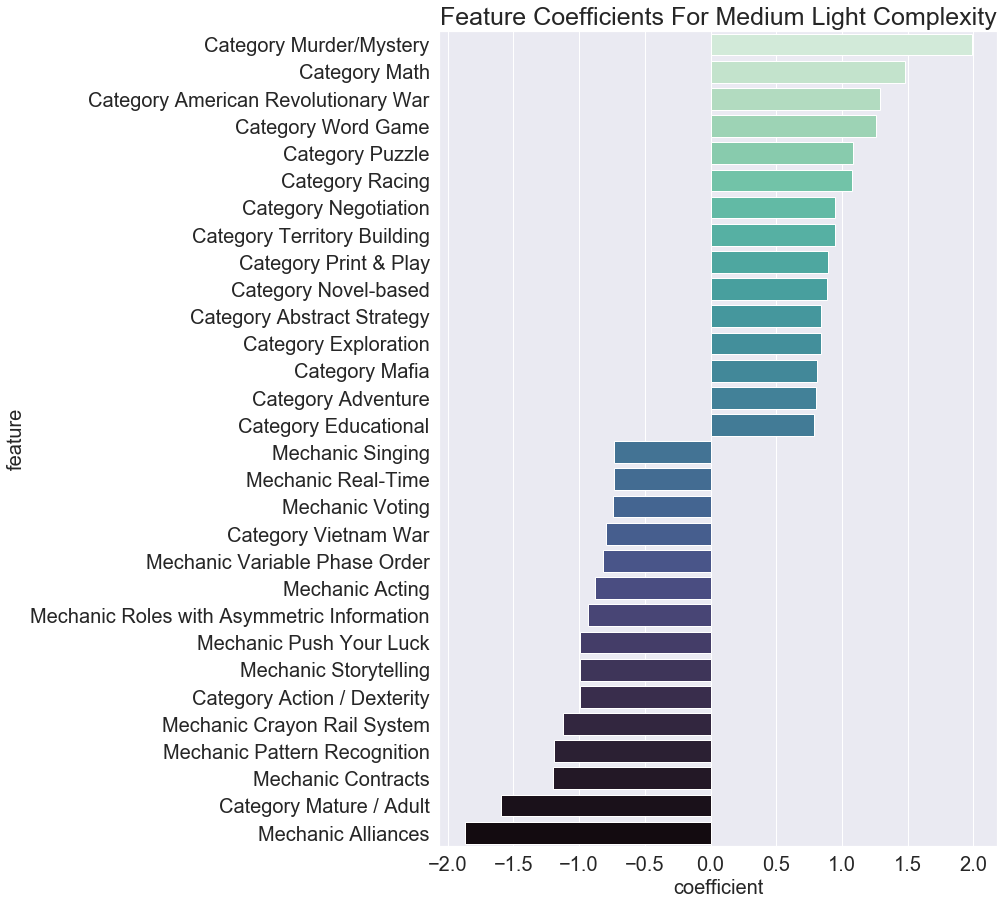

In [53]:
coef_plot('medium light')

The murder mystery category is the biggest indicator that a game has medium light weight, or complexity. These games, like [Mountains of Madness](https://boardgamegeek.com/boardgame/205059/mansions-madness-second-edition) and a plethora of Sherlock Holmes-inspired games, task players with solves a murder or a series of murders. These games are often cooperative, with players working together. It's easier to get players to work together if the rules aren't too complex.

Math, American Revolutionary War, and word games are also big indicators of medium light complexity. Games in these categories are likely meant to be either educational or are at least playable by a wide age range of people. Puzzle games are similarly good indicators of medium light complexity.

The slliances mechanic is the biggest negative coefficient for medium light complexity. In games like [Werewolf](https://boardgamegeek.com/boardgame/925/werewolf) players can form alliances in an attempt to win the game together. This mechanic is also popular in strategy games like [Struggle of Empires](https://boardgamegeek.com/boardgame/9625/struggle-empires) where players make and break temporary alliances throughout the course of the game. The mechanics has a tendency to be used in more complex games.

Mature or adult games are a big negative coefficient for medium light, as we've already seen that it's a strong indicator that a game is simpler. Storytelling and pattern recognition are similarly indicators that a game is less complex than medium light. The roles with asymmetric information also indicates lower complexity.

The Vietnam War ctaegory and contracts mechanic are likely indicators that a game is heavier than medium light.

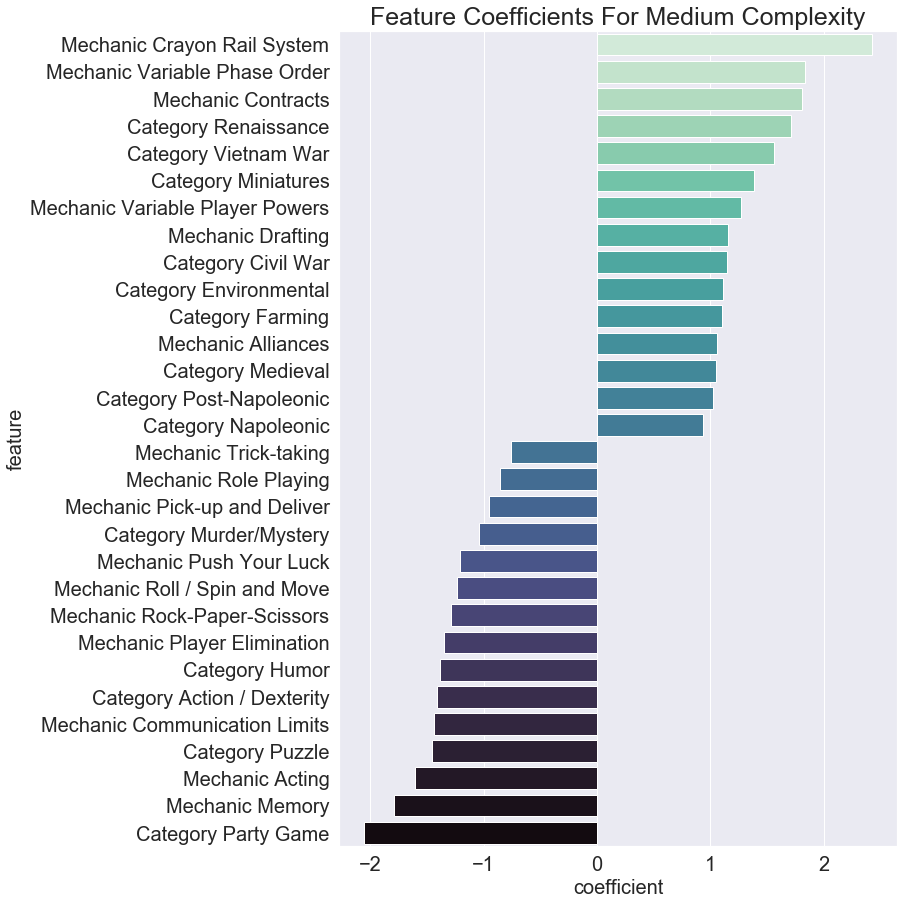

In [54]:
coef_plot('medium')

While the name suggests it'd be a simpler mechanic, the biggest coefficient for medium weight is crayon rail system. Crayon rail system games are games where players use crayons or other non-permanent means to draw routes on a game board. The system is widely used in railroad building games like [Eurorails](https://boardgamegeek.com/boardgame/157/eurorails), and is strong indicator that a game is complicated, but not too much for most people.

The variable phase order mechanic is the second largest indicator that a game is of medium weight. This includes games like [Puerto Rico](https://boardgamegeek.com/boardgame/3076/puerto-rico) where each turn is different from the last. That means that maybe phases of a turn are played out of order, or simply there's different things to do each time a player takes a turn.

Tied with variable phase order is the contracts mechanics where players fulfill contracts to earn rewards in the game. Games set in the Renaissance and the Vietnam War are also most likely to have medium complexity. It's easy to see how contracts can be used in both of those categories.

Party games, memory mechanics, and the puzzle category are all indicators that a game isn't of medium complexity. All of these were more indicative of light complexity. Acting and the push your luck mechanic are also big negative coefficients here that were positive coefficients for the light comnplexity class.

The communication limits and player elimination mechanics are also negative coefficients for medium complexity. They are likely both indicators of more complex games.

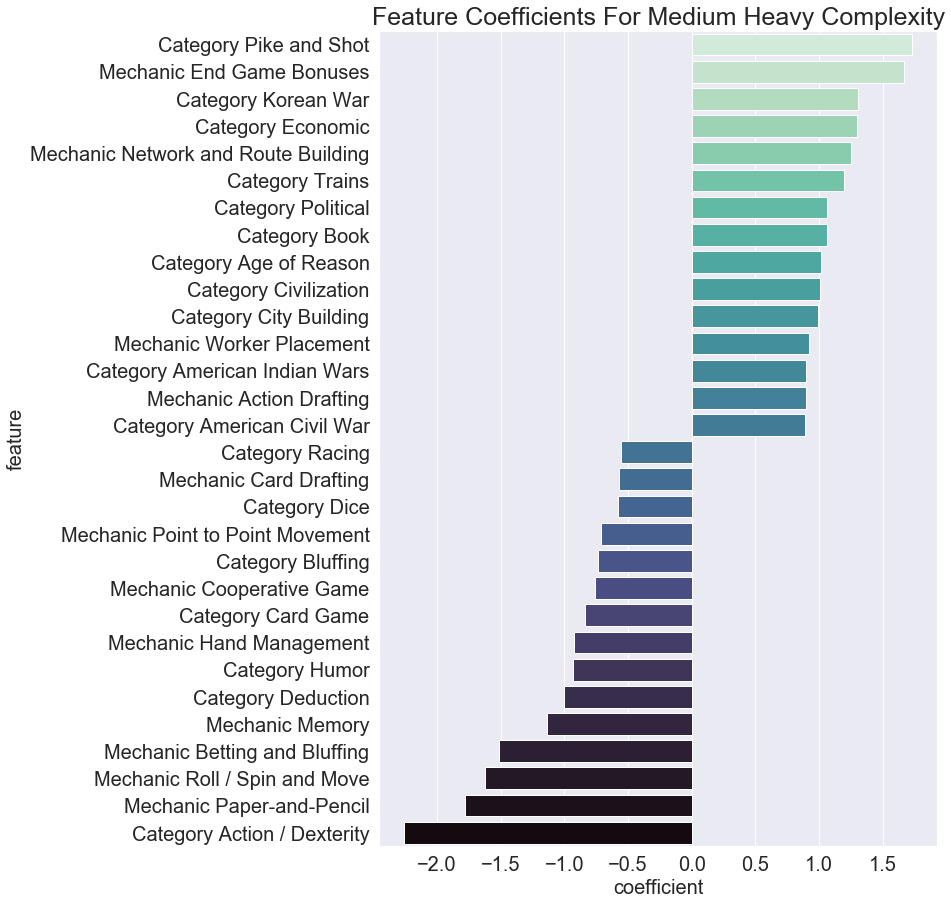

In [55]:
coef_plot('medium heavy')

The biggest indicator of a board game having medium heavy complexity is the pike and shot category. These games are generally war games that take place between the 16th and early 18th century. These tend to be rather complex games like [Pax Renaissane](https://boardgamegeek.com/boardgame/198953/pax-renaissance) where players "finance kings or republics, sponsor voyages of discovery, join secret cabals, or unleash jihads and inquisitions."

Other categories that signify medium heavy complexity are Korean War, economic, trains, and political games. Each of these categories tend to have rather complex rules that suit this complexity class. Games with economic mechanics, for example, have a player-run economy in the game that impacts how it's played. In train games players are often tasked with building train networks and managing entire train companies throughout the game.

The inclusion of train games also explains the inclusion of network and route building in this class, as the two typically go hand-in-hand.

The largest negative coefficient for medium heavy complex games is the action/dexterity category. This category was a big indicator that a game has light complexity. The category typically includes games that test a players physical reflexes and coordination. It's easy to see why such games would be considered more simple by the model.

Other categories that signify a game doesn't have medium hevay complexity include humor, card games, and racing. These were all included in lower complexity classes as positive coefficients. There are also several mechanics such as memory, roll/spin and move, cooperative games, and card drafting that were included as positive coefficients in lower complexity classes.

Interestingly, the paper-and-pencil mechanic is a signifier that a game is not medium heavy complex. This mechanic involves using a paper and pencil to keep track of scores in a game. Games with this mechanic tend to be simpler, as the score tracking doesn't include much math beyond addition and subtraction.

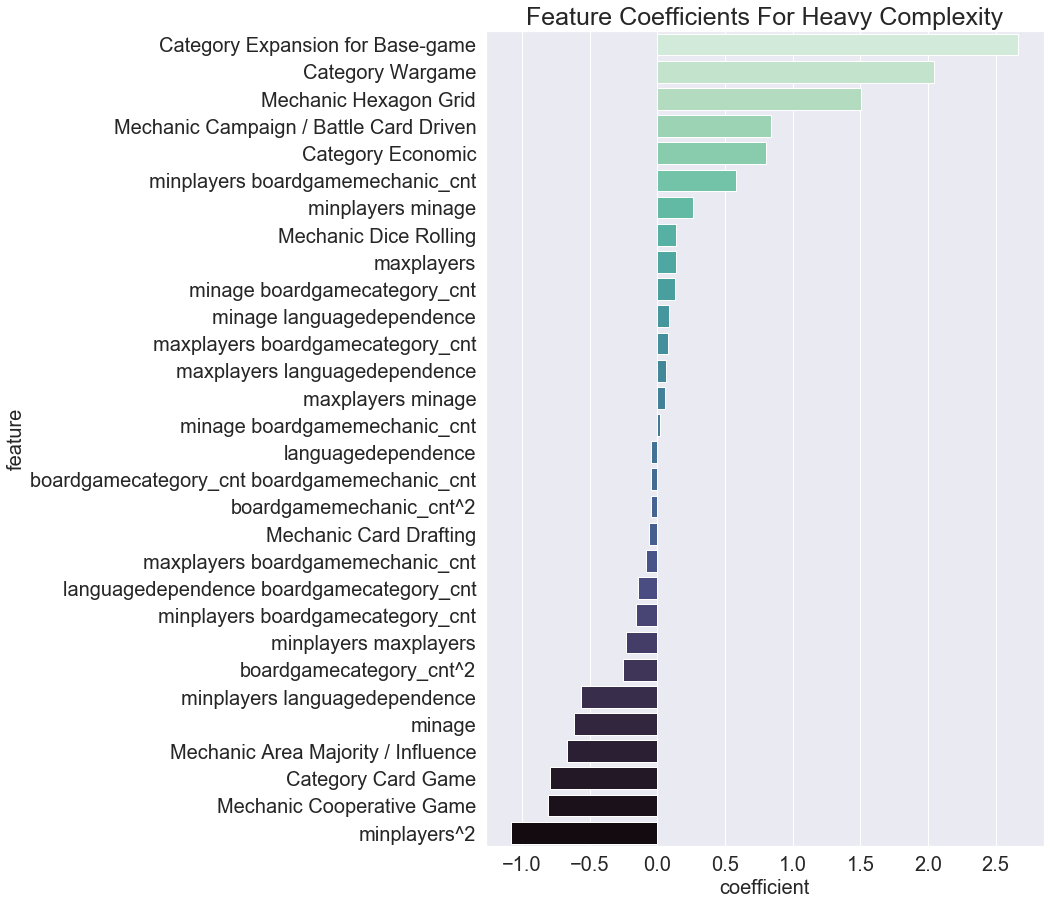

In [56]:
coef_plot('heavy')

The biggest coefficient for heavy comlexity is an expansion for base games, with war games being the second biggest coefficient. This checks out as war games tend to be very complex games with many miniatures and a number of expansion rule books. This includes games like Warhammer 40,000 where players control an army of space marines, space orcs, space elves, or any number of fantasy races in a science-fiction setting. The games usually involves using rulers to move units around a play area and somewhat complex math during combat.

Other non-war games also have a number of expansions. [Settlers of Catan](https://boardgamegeek.com/boardgame/13/catan), for example, has multiple expansions that each add another layer of complexity to the game whether it be more hexes or a separate island or seafaring.

Hexagon grid mechanics are also a strong indicator that a game is more complex, as movement on a hexagonal grid in itself can be fairly confusing to new players.

Card games and cooperative games are strong indicators that a game does not have heavy complexity. These two features usually mean a game is a bit simpler. While there are complicated cooperative games like [Mage Knight](https://boardgamegeek.com/boardgame/96848/mage-knight-board-game), more of those games like [Pandemic](https://boardgamegeek.com/boardgame/30549/pandemic) are less complex. Card games, meanwhile, can be complicated, but unless you're talking about collectible card games like Magic: The Gathering, card games tend to on the simpler end.

Interestingly, the heavy complexity class is the only class where features other than mechanics and categories seem to matter. The engineered feature of minimum players times the number of mechanics is a relatively strong indicator of heavy complexity. As both of those values increase, the more complex a game is likely to be. This makes sense as games that require large groups of people using a large number of mechanics tend to be more complicated games. The strategy and war game [Root](https://boardgamegeek.com/boardgame/237182/root), while it doesn't fall into the heavy weight class, is a good example of this, as the base game typically has three to four players and with nine different mechanics. The expansions of the game only add more complexity to that.

The squared minimum number of players is a strong indicator that a game is less complex. The minimum number of players times the language dependency is also an indicator that a game is less complex. While there are complex games that have a large number of players, many card or party games that have a large number of minimum players are more simple. Think of games like Dixit again, which can support a large number of players but it doesn't require players to have a strong grasp of language because there are no words on the cards.

Of course, while this is all very ineresting, the Logistic Regression model was unable to correctly classify any heavy complexity games. All 11 heavy weight games in the test set were sorted into other complexity classes by this model.

# Conclusion

While there is some correlation between the mechanics and categories of board games and their complexity, there isn't enough of a correlation to have a significantly accurate model. Even the best model I was able to build only had an accuracy of about 66%. Information that seemed like it might have a big impact on the reults like the suggested minimum age of players or the language dependency of the game didn't seem to have much of an impact on the accuracy of the models. My idea that these things would make it easy for a designer to find out how complex a game they're designing is didn't work out as planned.

It turns out there's much more to a board game's complexity than just the easily quantifiable stats about them. Board Game Geek's website suggests that the weight rating can include things like the amount of luck involved in a game, how much technical skill is involved, or how thick or complex is the rulebook. These are qualites that aren't easily quantifiable, or are at least not easily obtained without surveying players for each game.

# Recommendations

Given more compute power, I would be interested in doing natural language processing on the description of board games and add it to the model, to see how that impacts the results. I tried to do that as part of this project, but the models ended up taking up far too much memory and ultimately crashed my computer. It might even be interesting to use just natural language processing on the descriptions with nothing else to see how that impacts the results. It could be that descriptions are better at predicting the complexity.

It would also be interested to somehow obtain more data about each board game like the number of pieces or the length of the rulebook to see how that impacts the weight rating.

Another possible idea would be to use image recognition on images of a game board to see if that can impact complexity. Veteran board game players can typically tell how complicated a board game is going to be by just looking at the board, and it'd be interested to see if a nueral network can be trained to do the same thing.

# Production

Code for a production model can be found in in [this repo](https://github.com/q-downgrade/board-game-complexity-predictor). That folder contains a notebook used to identify the best model to use for production as well as the code for the Flask app used the deploy the model. The deployed model can be found [here](https://board-game-complexity.herokuapp.com/).

# Sources

- [Kaggle](https://www.kaggle.com/extralime/20000-boardgames-dataset)
- [Board Game Geek Wiki](https://boardgamegeek.com/wiki/page/Weight)
- [Board Game Geek](https://boardgamegeek.com)